Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), а также имя пользователя (name), и дата этих покупок (date, соответствует названию папки, где лежит папка с пользователем)

In [68]:
import pandas as pd
import os
from pathlib import Path
import seaborn as sns

In [16]:
path=Path(r'\Users\Минипроект\data')

In [49]:
#create df for all data
df=pd.DataFrame()

#read data from all files and add it to general df
for current_path, dirs, files in os.walk(path):
    for file in files:
        part_path=Path(current_path)
        data_path= part_path / file
       
    #read data
        temp_df=pd.read_csv(data_path)
    
    #extract date and name
        date=data_path.parts[-3]
        name=data_path.parts[-2]
      
    #add date and name columns
        temp_df['date']=date
        temp_df['name']=name
     #insert data into main df
        df=pd.concat((df,temp_df))
        
  

In [48]:
df.shape

(161, 5)

In [51]:
df.head()

,Unnamed: 0,product_id,quantity,date,name
0,0,47,1,2020-12-03,Alexey_Smirnov
1,1,57,1,2020-12-03,Alexey_Smirnov
2,2,14,2,2020-12-03,Alexey_Smirnov
3,3,52,1,2020-12-03,Alexey_Smirnov
4,4,1,4,2020-12-03,Alexey_Smirnov


Визуализируйте продажи по дням

<AxesSubplot:xlabel='date'>

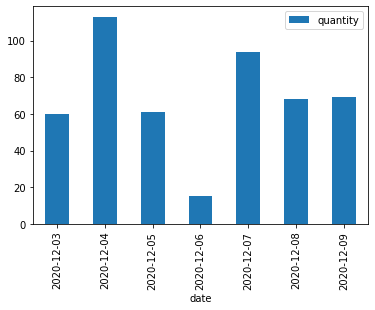

In [53]:
df.groupby('date')\
    .agg({'quantity':'sum'})\
    .plot(kind='bar')

Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни.

In [91]:
df.groupby(['name','product_id'])\
    .agg({'date':pd.Series.nunique})\
    .query('date>1')

,,date
name,product_id,
Anton_Ivanov,15,2
Petr_Fedorov,94,2


Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.

In [60]:
df.groupby('name')\
    .agg({'quantity':'sum'})\
    .sort_values('quantity',ascending=False)

,quantity
name,
Alexey_Smirnov,52
Petr_Smirnov,52
Anton_Smirnov,45
Petr_Fedorov,34
Kirill_Fedorov,28
Rostislav_Petrov,28
Vasiliy_Ivanov,27
Alexey_Fedorov,24
Anton_Ivanov,23


Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. Сколько было продано единиц товара с product_id==56?

In [82]:
product_sells=df.groupby('product_id',as_index=False)\
    .agg({'quantity':'sum'})\
    .sort_values('quantity',ascending=False)\
    .head(10)

In [83]:
product_sells

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


<AxesSubplot:xlabel='product_id', ylabel='quantity'>

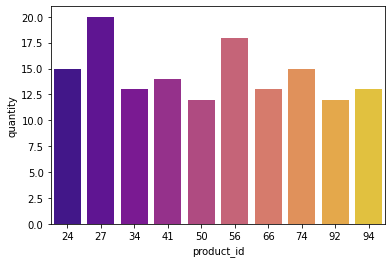

In [87]:
sns.barplot(x='product_id',y='quantity',data=product_sells, palette='plasma')